In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [4]:
df1=pd.read_csv('project2/Seoul.csv')

In [5]:
df2=pd.read_csv('project2/Seoul_Test.csv')

In [6]:
df1 = df1.append(df2,ignore_index=True)

In [8]:
df1["연월"] = pd.to_datetime(df1["연월"],format='%Y%m')
df1.head()

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,2019-01-01,서울,강남구,건강보조식품 소매업,강원,강릉시,60s,2,5,7,1181300,8
1,2019-01-01,서울,강남구,건강보조식품 소매업,강원,속초시,50s,2,4,3,756000,4
2,2019-01-01,서울,강남구,건강보조식품 소매업,강원,원주시,50s,2,4,6,2480710,14
3,2019-01-01,서울,강남구,건강보조식품 소매업,강원,원주시,60s,2,5,6,3604450,7
4,2019-01-01,서울,강남구,건강보조식품 소매업,강원,춘천시,50s,2,4,4,1952750,11


In [20]:
df1['매장_시도'].unique()

array(['서울'], dtype=object)

In [19]:
df1['매장_시군구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [9]:
df1['연령대'] = df1['연령대'].str.rstrip('s').astype('int')
df1.head()

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,2019-01-01,서울,강남구,건강보조식품 소매업,강원,강릉시,60,2,5,7,1181300,8
1,2019-01-01,서울,강남구,건강보조식품 소매업,강원,속초시,50,2,4,3,756000,4
2,2019-01-01,서울,강남구,건강보조식품 소매업,강원,원주시,50,2,4,6,2480710,14
3,2019-01-01,서울,강남구,건강보조식품 소매업,강원,원주시,60,2,5,6,3604450,7
4,2019-01-01,서울,강남구,건강보조식품 소매업,강원,춘천시,50,2,4,4,1952750,11


In [10]:
df1.연월.value_counts().sort_index()

2019-01-01    422792
2019-02-01    405164
2019-03-01    429994
2019-04-01    424973
2019-05-01    444836
2019-06-01    434237
2019-07-01    434803
2019-08-01    437459
2019-09-01    423804
2019-10-01    435724
2019-11-01    420767
2019-12-01    433798
2020-01-01    416459
2020-02-01    359041
2020-03-01    335651
2020-04-01    348300
Name: 연월, dtype: int64

In [11]:
df1['연월1'] = df1['연월']

In [12]:
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[0],1)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[1],2)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[2],3)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[3],4)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[4],5)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[5],6)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[6],7)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[7],8)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[8],9)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[9],10)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[10],11)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[11],12)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[12],13)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[13],14)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[14],15)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[15],16)

In [13]:
df1.연월1 = df1.연월1.astype(int)

In [16]:
df1.고객_시도.value_counts().sort_index()

강원     146353
경기    2008246
경남     185824
경북     153958
광주     102617
대구     142069
대전     106469
부산     231624
서울    2494747
세종      29975
울산      71219
인천     351445
전남     112013
전북     122429
제주      54445
충남     174664
충북     119705
Name: 고객_시도, dtype: int64

In [17]:
df1['고객_시도1'] = df1['고객_시도']

In [19]:
df1.고객_시도1 = df1.고객_시도1.replace('강원', 1)
df1.고객_시도1 = df1.고객_시도1.replace('경기', 2)
df1.고객_시도1 = df1.고객_시도1.replace('경남', 3)
df1.고객_시도1 = df1.고객_시도1.replace('경북', 4)
df1.고객_시도1 = df1.고객_시도1.replace('광주', 5)
df1.고객_시도1 = df1.고객_시도1.replace('대구', 6)
df1.고객_시도1 = df1.고객_시도1.replace('대전', 7)
df1.고객_시도1 = df1.고객_시도1.replace('부산', 8)
df1.고객_시도1 = df1.고객_시도1.replace('서울', 9)
df1.고객_시도1 = df1.고객_시도1.replace('세종', 10)
df1.고객_시도1 = df1.고객_시도1.replace('울산', 11)
df1.고객_시도1 = df1.고객_시도1.replace('인천', 12)
df1.고객_시도1 = df1.고객_시도1.replace('전남', 13)
df1.고객_시도1 = df1.고객_시도1.replace('전북', 14)
df1.고객_시도1 = df1.고객_시도1.replace('제주', 15)
df1.고객_시도1 = df1.고객_시도1.replace('충남', 16)
df1.고객_시도1 = df1.고객_시도1.replace('충북', 17)

In [20]:
df1['업종명1'] = df1['업종명']

In [21]:
len(df1.업종명.value_counts().sort_index().index)

39

In [22]:
for i in range(len(df1.업종명.value_counts().sort_index().index)) :
    df1.업종명1 = df1.업종명1.replace(df1.업종명.value_counts().sort_index().index[i],i+1)

In [23]:
df1

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,연월1,고객_시도1,업종명1
0,2019-01-01,서울,강남구,건강보조식품 소매업,강원,강릉시,60,2,5,7,1181300,8,1,1,1
1,2019-01-01,서울,강남구,건강보조식품 소매업,강원,속초시,50,2,4,3,756000,4,1,1,1
2,2019-01-01,서울,강남구,건강보조식품 소매업,강원,원주시,50,2,4,6,2480710,14,1,1,1
3,2019-01-01,서울,강남구,건강보조식품 소매업,강원,원주시,60,2,5,6,3604450,7,1,1,1
4,2019-01-01,서울,강남구,건강보조식품 소매업,강원,춘천시,50,2,4,4,1952750,11,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6607797,2020-04-01,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,40,2,3,7,46000,9,16,12,39
6607798,2020-04-01,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,50,2,4,4,64000,5,16,12,39
6607799,2020-04-01,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,60,1,5,3,72900,5,16,12,39
6607800,2020-04-01,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,60,2,5,9,64800,9,16,12,39


In [ ]:
df1.to_csv('모델링용.csv')

In [118]:
df1 = pd.read_csv('모델링용.csv')

In [105]:
d = pd.DataFrame(df1['이용금액'].groupby([df1['연월1'],df1['고객_시도1'],df1['업종명1']]).sum())

In [ ]:
d.to_csv('모델링용2.csv',encoding = 'utf-8')  

In [119]:
df2 = pd.read_csv('모델링용2.csv') 

In [120]:
X = df2

In [121]:
train_df = X.sample( frac = 0.8, random_state = 0 )
test_df = X.drop( train_df.index )

In [122]:
y_train = train_df.pop( '이용금액' )
y_test = test_df.pop( '이용금액' )

In [123]:
X_train = np.asarray( train_df)
X_test = np.asarray( test_df )

In [124]:
X_train = np.array( X_train )
X_test = np.array( X_test )

In [125]:
y_train = np.array( y_train )
y_test = np.array( y_test )

In [127]:
import xgboost
model = xgboost.XGBRegressor(learning_rate=0.1,
                             max_depth=50,
                             n_estimators=1000) 

In [128]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=50,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

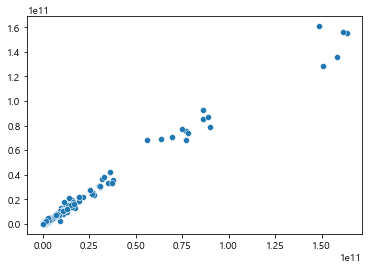

In [129]:
sns.scatterplot(y_test, model.predict(X_test));

In [17]:
predictions = [round(value) for value in model.predict(X_test)]
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

In [18]:
print('explained_variance_score: {}'.format(explained_variance_score(y_test, model.predict(X_test))))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, model.predict(X_test))))
print('r2_score: {}'.format(r2_score(y_test, model.predict(X_test))))

explained_variance_score: 0.9899647115799959
mean_squared_errors: 1.1273750099334717e+18
r2_score: 0.9899484193366147


In [133]:
from xgboost import plot_importance

In [141]:
aa=pd.read_csv('project2/Seoul.csv')

array([[12, 13, 21],
       [ 6,  8, 30],
       [13, 15,  6],
       ...,
       [ 3,  4, 26],
       [11, 11,  1],
       [ 6, 12,  7]], dtype=int64)

In [168]:
forest=RandomForestRegressor(n_estimators=1000, criterion='mse')

In [169]:
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [170]:
mean_squared_error(y_test, forest.predict(X_test))

0.009846896834895268

In [171]:
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

r2_train=r2_score(y_train,y_train_pred)

r2_test=r2_score(y_test,y_test_pred)
print('R2- Train: %.3f, Test: %.3f'%(r2_train,r2_test))

R2- Train: 0.999, Test: 0.993


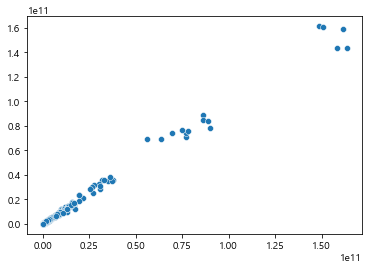

In [157]:
sns.scatterplot(y_test, forest.predict(X_test));

In [41]:
submission= pd.read_excel('submission2.xlsx') 

In [42]:
submission

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강남구,건강보조식품 소매업,0
1,1,202004,강남구,골프장 운영업,0
2,2,202004,강남구,과실 및 채소 소매업,0
3,3,202004,강남구,관광 민예품 및 선물용품 소매업,0
4,4,202004,강남구,그외 기타 분류안된 오락관련 서비스업,0
...,...,...,...,...,...
1020,1020,202004,중랑구,피자 햄버거 샌드위치 및 유사 음식점업,0
1021,1021,202004,중랑구,한식 음식점업,0
1022,1022,202004,중랑구,호텔업,0
1023,1023,202004,중랑구,화장품 및 방향제 소매업,0


In [44]:
# 모델이 넣을 변수 모양을 만들기 위해 파생변수 생성
submission['업종명'] = submission['STD_CLSS_NM']
submission['연월'] = submission['REG_YYMM']
submission['매장_시군구'] = submission['CARD_SIDO_NM']  

In [45]:
for i in range(len(submission.STD_CLSS_NM.value_counts().sort_index().index)) :
    submission.업종명 = submission.업종명.replace(submission.STD_CLSS_NM.value_counts().sort_index().index[i],i+1)

In [47]:
for i in range(len(submission.CARD_SIDO_NM.value_counts().sort_index().index)) :
    submission.매장_시군구 = submission.매장_시군구.replace(submission.CARD_SIDO_NM.value_counts().sort_index().index[i],i+1)

In [49]:
submission.연월 = submission.연월.replace(submission.연월.value_counts().sort_index().index[0],16)

In [50]:
submission.연월

0       16
1       16
2       16
3       16
4       16
        ..
1020    16
1021    16
1022    16
1023    16
1024    16
Name: 연월, Length: 1025, dtype: int64

In [53]:
pred = submission[['연월','매장_시군구','업종명']]  

In [54]:
pred = np.asarray(pred)
pred = np.array(pred)

In [55]:
submission.AMT = list(model.predict(pred).round(0).astype(int))

In [56]:
submission.pop('업종명')
submission.pop('연월')
submission.pop('매장_시군구')

0        1
1        1
2        1
3        1
4        1
        ..
1020    25
1021    25
1022    25
1023    25
1024    25
Name: 매장_시군구, Length: 1025, dtype: int64

In [173]:
submission.head(10)

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT,시군구,업종명,연월,매장_시군구
0,0,202004,강남구,건강보조식품 소매업,599999,강남구,1,16,1
1,1,202004,강남구,골프장 운영업,599999,강남구,2,16,1
2,2,202004,강남구,과실 및 채소 소매업,6403896,강남구,3,16,1
3,3,202004,강남구,관광 민예품 및 선물용품 소매업,386000,강남구,4,16,1
4,4,202004,강남구,그외 기타 분류안된 오락관련 서비스업,461651776,강남구,5,16,1
5,5,202004,강남구,그외 기타 스포츠시설 운영업,461651776,강남구,6,16,1
6,6,202004,강남구,그외 기타 종합 소매업,63865592,강남구,7,16,1
7,7,202004,강남구,기타 대형 종합 소매업,2526999,강남구,8,16,1
8,8,202004,강남구,기타 수상오락 서비스업,2526999,강남구,9,16,1
9,9,202004,강남구,기타 외국식 음식점업,507500,강남구,10,16,1


In [62]:
model1 = LinearRegression()

In [63]:
model1.fit(X_train, y_train)

LinearRegression()

In [61]:
from sklearn.linear_model import LinearRegression

In [64]:
model1.predict(X_test)

array([1.12894204e+09, 2.40550486e+09, 2.51651032e+09, ...,
       9.45570566e+08, 1.72260880e+09, 1.83361426e+09])

In [93]:
model1.coef_

array([ -4571916.98481525, -76552958.9480134 ,  55502731.04803278])

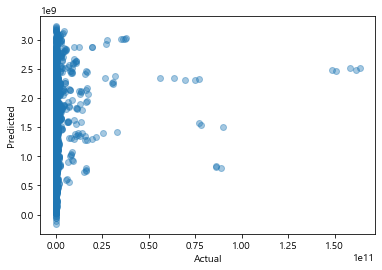

In [65]:
# 예측값과 실제값을 산점도로 비교
plt.scatter(y_test, model1.predict(X_test), alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [66]:
print(model1.score(X_train, y_train))

0.006780940376536648


In [159]:
df2 = pd.read_csv('모델링용2.csv') 

In [160]:
df2_stats = df2.describe()
df2_stats = df2_stats.transpose()
df2_stats

,count,mean,std,min,25%,50%,75%,max
연월1,9276.0,8.405563e+00,4.573052e+00,1.0,4.0,8.0,12.0,1.600000e+01
고객_시도1,9276.0,8.943295e+00,4.896120e+00,1.0,5.0,9.0,13.0,1.700000e+01
업종명1,9276.0,2.119394e+01,1.103280e+01,1.0,12.0,22.0,30.0,3.900000e+01
이용금액,9276.0,1.668571e+09,9.070539e+09,3000.0,6533120.0,68465277.5,424656313.5,1.750131e+11


In [161]:
def normalization( x ):
  return ( x - df2_stats[ 'mean' ] ) / df2_stats[ 'std' ]

In [162]:
# 정규화 실시 
df3 = normalization(df2)
df2['이용금액'] = df3['이용금액']
df2

,연월1,고객_시도1,업종명1,이용금액
0,1,1,1,-0.182673
1,1,1,3,-0.183846
2,1,1,4,-0.183887
3,1,1,6,-0.134666
4,1,1,7,-0.162537
...,...,...,...,...
9271,16,17,35,0.015746
9272,16,17,36,-0.180255
9273,16,17,37,-0.162000
9274,16,17,38,-0.183504


In [163]:
# train, test 데이터로 나누기
train_df2 = df2.sample( frac = 0.8, random_state = 0 )
test_df2 = df2.drop( train_df2.index )

In [164]:
# y데이터 분리
y_train = train_df2.pop( '이용금액' )
y_test = test_df2.pop( '이용금액' )

In [165]:
# X,y 데이터를 NumPy 배열로 변경
X_train = np.asarray( train_df2)
X_test = np.asarray( test_df2)

In [166]:
X_train = np.array( train_df2)
X_test = np.array( test_df2)

In [167]:
y_train = np.array( y_train )
y_test = np.array( y_test )

In [76]:
modelB = xgboost.XGBRegressor(learning_rate=0.1,
                             max_depth=50,
                              n_estimators=1000) 

In [77]:
modelB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=50,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:>

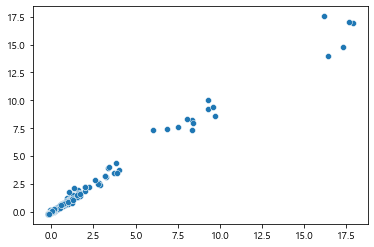

In [78]:
sns.scatterplot(y_test, modelB.predict(X_test))

In [79]:
predictions = [round(value) for value in modelB.predict(X_test)]

In [80]:
print('explained_variance_score: {}'.format(explained_variance_score(y_test, modelB.predict(X_test))))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, modelB.predict(X_test))))
print('r2_score: {}'.format(r2_score(y_test, modelB.predict(X_test))))

explained_variance_score: 0.9901808222782266
mean_squared_errors: 0.013399948689118351
r2_score: 0.990170412556166


,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT,시군구,업종명,연월,매장_시군구
943,943,202004,중구,건강보조식품 소매업,776171,중구,1,16,24
944,944,202004,중구,골프장 운영업,3270640,중구,2,16,24
945,945,202004,중구,과실 및 채소 소매업,7242627,중구,3,16,24
946,946,202004,중구,관광 민예품 및 선물용품 소매업,-16281,중구,4,16,24
947,947,202004,중구,그외 기타 분류안된 오락관련 서비스업,6725838,중구,5,16,24
948,948,202004,중구,그외 기타 스포츠시설 운영업,627754496,중구,6,16,24
949,949,202004,중구,그외 기타 종합 소매업,54077608,중구,7,16,24
950,950,202004,중구,기타 대형 종합 소매업,2154702,중구,8,16,24
951,951,202004,중구,기타 수상오락 서비스업,2154702,중구,9,16,24
952,952,202004,중구,기타 외국식 음식점업,69195,중구,10,16,24


In [82]:
submission['업종명'] = submission['STD_CLSS_NM']
submission['연월'] = submission['REG_YYMM']
submission['매장_시군구'] = submission['CARD_SIDO_NM']

In [83]:
for i in range(len(submission.STD_CLSS_NM.value_counts().sort_index().index)) :
    submission.업종명 = submission.업종명.replace(submission.STD_CLSS_NM.value_counts().sort_index().index[i],i+1)

In [85]:
for i in range(len(submission.CARD_SIDO_NM.value_counts().sort_index().index)) :
    submission.매장_시군구 = submission.매장_시군구.replace(submission.CARD_SIDO_NM.value_counts().sort_index().index[i],i+1)

In [84]:
submission.연월 = submission.연월.replace(submission.연월.value_counts().sort_index().index[0],16)

In [87]:
# 모델에 넣을 변수만 추출후 NumPy 배열로 변경
pred = submission[['연월','매장_시군구','업종명']]
pred = np.asarray(pred)
pred = np.array(pred)

In [88]:
prd = modelB.predict(pred)  # 예측값 알아보기
prd

array([-0.18418004, -0.18086289, -0.17943183, ..., -0.16479176,
       -0.16479176, -0.16479176], dtype=float32)

In [106]:
# 예측값이 정규화된 형태라 정규화 역과정을 통해 실제 예측값으로 변경 후 확인
sub = pd.DataFrame(prd*d['이용금액'].std() + d['이용금액'].mean())
sub

,0
0,-2040704.0
1,28047488.0
2,41028096.0
3,-448256.0
4,310757248.0
...,...
1020,262405888.0
1021,-529536.0
1022,173821312.0
1023,173821312.0
